In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time 
import math
import keras

#importing all libraries and dependancies

Using TensorFlow backend.


In [2]:
#using pandas to make dataframe and input data

df = pd.read_csv('/home/anshul/Desktop/MAchine_learning/LSTM/nifty5Y.csv',delimiter=',')
df=df.set_index(['Date'])
#df.drop(df.columns[[5,6,7,9]],axis=1,inplace=True)
df.drop(df.columns[[0,1,2,3]],axis=1, inplace=True)
df.head(5)


,Adj Close,Volume,Next day
Date,,,
2013-06-07,5881.000000,118300.0,5878.000000
2013-06-10,5878.000000,100100.0,5788.799805
2013-06-11,5788.799805,180900.0,5760.200195
2013-06-12,5760.200195,140400.0,5699.100098
2013-06-13,5699.100098,142000.0,5808.399902


In [3]:
df.describe()

,Adj Close,Volume,Next day
count,1223.000000,1223.000000,1223.000000
mean,8254.863455,183172.444808,8258.859367
std,1373.142920,58884.400479,1373.339898
min,5285.000000,0.000000,5285.000000
25%,7568.024902,146000.000000,7568.424805
50%,8246.849609,172800.000000,8248.250000
75%,9013.350097,207100.000000,9037.825195
max,11130.400391,610300.000000,11130.400391


In [4]:
df.fillna(0)
df.info()
df.columns = ['Close','Volume','Next_day']

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 2013-06-07 to 2018-06-06
Data columns (total 3 columns):
Adj Close    1223 non-null float64
Volume       1223 non-null float64
Next day     1223 non-null float64
dtypes: float64(3)
memory usage: 38.2+ KB


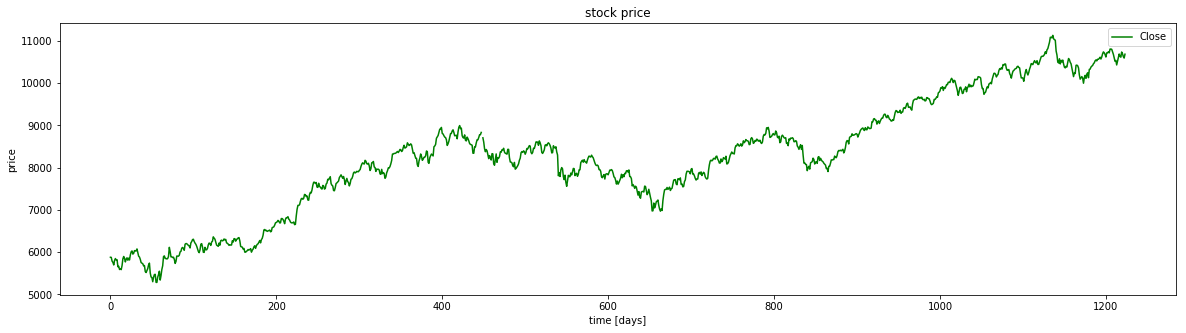

In [5]:
plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(df.Close.values,color='green',label='Close')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

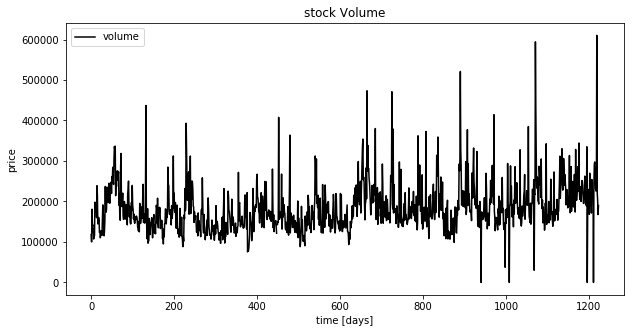

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.plot(df.Volume.values,color='black',label='volume')
plt.title('stock Volume')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [7]:
#we have empty values for prices on certain days and volume on certain days in 0, these rows will be deleted 
df = df[np.isfinite(df['Close'])]
df = df[np.isfinite(df['Volume'])]
df = df[np.isfinite(df['Next_day'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 2013-06-07 to 2018-06-06
Data columns (total 3 columns):
Close       1222 non-null float64
Volume      1222 non-null float64
Next_day    1222 non-null float64
dtypes: float64(3)
memory usage: 38.2+ KB


In [8]:
df1=df
df.head()
df1
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)
df1[0:5]

array([[0.10196051, 0.1938391 , 0.10144729],
       [0.10144729, 0.1640177 , 0.08618739],
       [0.08618739, 0.2964116 , 0.08129472],
       [0.08129472, 0.23005079, 0.07084204],
       [0.07084204, 0.23267246, 0.08954047]])

In [9]:
#splitting data ito 80:20 split for training and testing

train_size = int(len(df) * 0.92)
test_size = len(df) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df),:]
print(len(train),len(test))

1124 98


In [10]:
def create(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0:2]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 2])
    return np.array(dataX), np.array(dataY)

In [11]:
look_back=10
trainX, trainY = create(train, look_back)
testX, testY = create(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[2]))
trainX.shape

(1113, 10, 2)

In [12]:
trainX[0:5]
trainY[0:5]

array([0.05222055, 0.05544532, 0.05195541, 0.06797654, 0.09532284])

In [25]:
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, 2)))
model.add(Dense(1))
adm = keras.optimizers.Adam(lr = 0.0005)
model.compile(loss='mean_squared_error', optimizer=adm)
model.fit(trainX, trainY, epochs=2000, batch_size=8, verbose=1)



Epoch 1/2000
1113/1113 [==============================] - 1s 1ms/step - loss: 0.0906
Epoch 2/2000
1113/1113 [==============================] - 1s 622us/step - loss: 0.0033
Epoch 3/2000
1113/1113 [==============================] - 1s 624us/step - loss: 0.0019
Epoch 4/2000
1113/1113 [==============================] - 1s 616us/step - loss: 0.0015
Epoch 5/2000
1113/1113 [==============================] - 1s 562us/step - loss: 0.0013
Epoch 6/2000
1113/1113 [==============================] - 1s 565us/step - loss: 0.0012
Epoch 7/2000
1113/1113 [==============================] - 1s 566us/step - loss: 0.0011
Epoch 8/2000
1113/1113 [==============================] - 1s 560us/step - loss: 9.5087e-04
Epoch 9/2000
1113/1113 [==============================] - 1s 555us/step - loss: 8.8863e-04
Epoch 10/2000
1113/1113 [==============================] - 1s 552us/step - loss: 8.2706e-04
Epoch 11/2000
1113/1113 [==============================] - 1s 583us/step - loss: 7.9418e-04
Epoch 12/2000
1113/1113 [==

1113/1113 [==============================] - 1s 532us/step - loss: 4.4729e-04
Epoch 91/2000
1113/1113 [==============================] - 1s 539us/step - loss: 4.5432e-04
Epoch 92/2000
1113/1113 [==============================] - 1s 540us/step - loss: 4.6241e-04
Epoch 93/2000
1113/1113 [==============================] - 1s 542us/step - loss: 4.3603e-04
Epoch 94/2000
1113/1113 [==============================] - 1s 539us/step - loss: 4.3995e-04
Epoch 95/2000
1113/1113 [==============================] - 1s 539us/step - loss: 4.3550e-04
Epoch 96/2000
1113/1113 [==============================] - 1s 553us/step - loss: 4.3223e-04
Epoch 97/2000
1113/1113 [==============================] - 1s 536us/step - loss: 4.3081e-04
Epoch 98/2000
1113/1113 [==============================] - 1s 545us/step - loss: 4.2087e-04
Epoch 99/2000
1113/1113 [==============================] - 1s 595us/step - loss: 4.2648e-04
Epoch 100/2000
1113/1113 [==============================] - 1s 548us/step - loss: 4.2148e-04
E

1113/1113 [==============================] - 1s 554us/step - loss: 3.3904e-04
Epoch 179/2000
1113/1113 [==============================] - 1s 565us/step - loss: 3.3958e-04
Epoch 180/2000
1113/1113 [==============================] - 1s 555us/step - loss: 3.4448e-04
Epoch 181/2000
1113/1113 [==============================] - 1s 555us/step - loss: 3.4288e-04
Epoch 182/2000
1113/1113 [==============================] - 1s 555us/step - loss: 3.3261e-04
Epoch 183/2000
1113/1113 [==============================] - 1s 555us/step - loss: 3.4246e-04
Epoch 184/2000
1113/1113 [==============================] - 1s 561us/step - loss: 3.2665e-04
Epoch 185/2000
1113/1113 [==============================] - 1s 558us/step - loss: 3.4030e-04
Epoch 186/2000
1113/1113 [==============================] - 1s 562us/step - loss: 3.2861e-04
Epoch 187/2000
1113/1113 [==============================] - 1s 562us/step - loss: 3.2922e-04
Epoch 188/2000
1113/1113 [==============================] - 1s 556us/step - loss: 3.3

1113/1113 [==============================] - 1s 529us/step - loss: 3.2118e-04
Epoch 267/2000
1113/1113 [==============================] - 1s 527us/step - loss: 3.2547e-04
Epoch 268/2000
1113/1113 [==============================] - 1s 527us/step - loss: 3.2842e-04
Epoch 269/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.2571e-04
Epoch 270/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.1973e-04
Epoch 271/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.2467e-04
Epoch 272/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.2559e-04
Epoch 273/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.2879e-04
Epoch 274/2000
1113/1113 [==============================] - 1s 536us/step - loss: 3.2190e-04
Epoch 275/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.2169e-04
Epoch 276/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.2

1113/1113 [==============================] - 1s 532us/step - loss: 3.2575e-04
Epoch 355/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.2454e-04
Epoch 356/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.2344e-04
Epoch 357/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.2477e-04
Epoch 358/2000
1113/1113 [==============================] - 1s 527us/step - loss: 3.1939e-04
Epoch 359/2000
1113/1113 [==============================] - 1s 532us/step - loss: 3.2502e-04
Epoch 360/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.2381e-04
Epoch 361/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.2033e-04
Epoch 362/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.2525e-04
Epoch 363/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.1557e-04
Epoch 364/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.2

1113/1113 [==============================] - 1s 529us/step - loss: 3.1672e-04
Epoch 443/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.1959e-04
Epoch 444/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.1793e-04
Epoch 445/2000
1113/1113 [==============================] - 1s 528us/step - loss: 3.2199e-04
Epoch 446/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.2430e-04
Epoch 447/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.1953e-04
Epoch 448/2000
1113/1113 [==============================] - 1s 528us/step - loss: 3.2106e-04
Epoch 449/2000
1113/1113 [==============================] - 1s 532us/step - loss: 3.2053e-04
Epoch 450/2000
1113/1113 [==============================] - 1s 528us/step - loss: 3.1815e-04
Epoch 451/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.1560e-04
Epoch 452/2000
1113/1113 [==============================] - 1s 532us/step - loss: 3.1

1113/1113 [==============================] - 1s 530us/step - loss: 3.1446e-04
Epoch 531/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.1343e-04
Epoch 532/2000
1113/1113 [==============================] - 1s 532us/step - loss: 3.1374e-04
Epoch 533/2000
1113/1113 [==============================] - 1s 533us/step - loss: 3.1106e-04
Epoch 534/2000
1113/1113 [==============================] - 1s 533us/step - loss: 3.1296e-04
Epoch 535/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.1118e-04
Epoch 536/2000
1113/1113 [==============================] - 1s 532us/step - loss: 3.1233e-04
Epoch 537/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.1771e-04
Epoch 538/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.1069e-04
Epoch 539/2000
1113/1113 [==============================] - 1s 529us/step - loss: 3.1426e-04
Epoch 540/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.1

1113/1113 [==============================] - 1s 552us/step - loss: 3.1951e-04
Epoch 619/2000
1113/1113 [==============================] - 1s 579us/step - loss: 3.1690e-04
Epoch 620/2000
1113/1113 [==============================] - 1s 552us/step - loss: 3.0912e-04
Epoch 621/2000
1113/1113 [==============================] - 1s 539us/step - loss: 3.0964e-04
Epoch 622/2000
1113/1113 [==============================] - 1s 534us/step - loss: 3.1165e-04
Epoch 623/2000
1113/1113 [==============================] - 1s 539us/step - loss: 3.1155e-04
Epoch 624/2000
1113/1113 [==============================] - 1s 549us/step - loss: 3.1032e-04
Epoch 625/2000
1113/1113 [==============================] - 1s 573us/step - loss: 3.1031e-04
Epoch 626/2000
1113/1113 [==============================] - 1s 581us/step - loss: 3.0928e-04
Epoch 627/2000
1113/1113 [==============================] - 1s 598us/step - loss: 3.0802e-04
Epoch 628/2000
1113/1113 [==============================] - 1s 635us/step - loss: 3.1

1113/1113 [==============================] - 1s 548us/step - loss: 3.1312e-04
Epoch 707/2000
1113/1113 [==============================] - 1s 563us/step - loss: 3.0825e-04
Epoch 708/2000
1113/1113 [==============================] - 1s 531us/step - loss: 3.1031e-04
Epoch 709/2000
1113/1113 [==============================] - 1s 542us/step - loss: 3.0646e-04
Epoch 710/2000
1113/1113 [==============================] - 1s 570us/step - loss: 3.0596e-04
Epoch 711/2000
1113/1113 [==============================] - 1s 553us/step - loss: 3.0567e-04
Epoch 712/2000
1113/1113 [==============================] - 1s 551us/step - loss: 3.0496e-04
Epoch 713/2000
1113/1113 [==============================] - 1s 558us/step - loss: 3.0683e-04
Epoch 714/2000
1113/1113 [==============================] - 1s 542us/step - loss: 3.0715e-04
Epoch 715/2000
1113/1113 [==============================] - 1s 574us/step - loss: 3.0781e-04
Epoch 716/2000
1113/1113 [==============================] - 1s 586us/step - loss: 3.1

1113/1113 [==============================] - 1s 554us/step - loss: 3.0379e-04
Epoch 795/2000
1113/1113 [==============================] - 1s 557us/step - loss: 3.0625e-04
Epoch 796/2000
1113/1113 [==============================] - 1s 554us/step - loss: 3.1160e-04
Epoch 797/2000
1113/1113 [==============================] - 1s 552us/step - loss: 3.1120e-04
Epoch 798/2000
1113/1113 [==============================] - 1s 551us/step - loss: 3.1458e-04
Epoch 799/2000
1113/1113 [==============================] - 1s 546us/step - loss: 3.0788e-04
Epoch 800/2000
1113/1113 [==============================] - 1s 537us/step - loss: 3.0902e-04
Epoch 801/2000
1113/1113 [==============================] - 1s 547us/step - loss: 3.0624e-04
Epoch 802/2000
1113/1113 [==============================] - 1s 552us/step - loss: 3.1753e-04
Epoch 803/2000
1113/1113 [==============================] - 1s 548us/step - loss: 3.1060e-04
Epoch 804/2000
1113/1113 [==============================] - 1s 552us/step - loss: 3.0

1113/1113 [==============================] - 1s 533us/step - loss: 3.0825e-04
Epoch 883/2000
1113/1113 [==============================] - 1s 533us/step - loss: 3.0615e-04
Epoch 884/2000
1113/1113 [==============================] - 1s 539us/step - loss: 3.1817e-04
Epoch 885/2000
1113/1113 [==============================] - 1s 548us/step - loss: 3.0545e-04
Epoch 886/2000
1113/1113 [==============================] - 1s 535us/step - loss: 3.0795e-04
Epoch 887/2000
1113/1113 [==============================] - 1s 574us/step - loss: 3.0583e-04
Epoch 888/2000
1113/1113 [==============================] - 1s 534us/step - loss: 3.0647e-04
Epoch 889/2000
1113/1113 [==============================] - 1s 536us/step - loss: 3.0713e-04
Epoch 890/2000
1113/1113 [==============================] - 1s 534us/step - loss: 2.9962e-04
Epoch 891/2000
1113/1113 [==============================] - 1s 530us/step - loss: 3.1159e-04
Epoch 892/2000
1113/1113 [==============================] - 1s 575us/step - loss: 3.0

1113/1113 [==============================] - 1s 542us/step - loss: 3.0680e-04
Epoch 971/2000
1113/1113 [==============================] - 1s 574us/step - loss: 3.0159e-04
Epoch 972/2000
1113/1113 [==============================] - 1s 562us/step - loss: 3.0463e-04
Epoch 973/2000
1113/1113 [==============================] - 1s 599us/step - loss: 3.0496e-04
Epoch 974/2000
1113/1113 [==============================] - 1s 597us/step - loss: 3.0526e-04
Epoch 975/2000
1113/1113 [==============================] - 1s 628us/step - loss: 3.0440e-04
Epoch 976/2000
1113/1113 [==============================] - 1s 638us/step - loss: 3.0809e-04
Epoch 977/2000
1113/1113 [==============================] - 1s 604us/step - loss: 3.0332e-04
Epoch 978/2000
1113/1113 [==============================] - 1s 561us/step - loss: 3.0938e-04
Epoch 979/2000
1113/1113 [==============================] - 1s 562us/step - loss: 3.0988e-04
Epoch 980/2000
1113/1113 [==============================] - 1s 656us/step - loss: 3.0

1113/1113 [==============================] - 1s 594us/step - loss: 3.0404e-04
Epoch 1058/2000
1113/1113 [==============================] - 1s 556us/step - loss: 3.0365e-04
Epoch 1059/2000
1113/1113 [==============================] - 1s 544us/step - loss: 3.0323e-04
Epoch 1060/2000
1113/1113 [==============================] - 1s 538us/step - loss: 3.0204e-04
Epoch 1061/2000
1113/1113 [==============================] - 1s 554us/step - loss: 3.0810e-04
Epoch 1062/2000
1113/1113 [==============================] - 1s 625us/step - loss: 3.0283e-04
Epoch 1063/2000
1113/1113 [==============================] - 1s 544us/step - loss: 3.0647e-04
Epoch 1064/2000
1113/1113 [==============================] - 1s 538us/step - loss: 3.0146e-04
Epoch 1065/2000
1113/1113 [==============================] - 1s 551us/step - loss: 3.0324e-04
Epoch 1066/2000
1113/1113 [==============================] - 1s 552us/step - loss: 3.0530e-04
Epoch 1067/2000
1113/1113 [==============================] - 1s 547us/step -

1113/1113 [==============================] - 1s 599us/step - loss: 2.9978e-04
Epoch 1145/2000
1113/1113 [==============================] - 1s 619us/step - loss: 3.0091e-04
Epoch 1146/2000
1113/1113 [==============================] - 1s 566us/step - loss: 3.0426e-04
Epoch 1147/2000
1113/1113 [==============================] - 1s 613us/step - loss: 3.0481e-04
Epoch 1148/2000
1113/1113 [==============================] - 1s 642us/step - loss: 3.0076e-04
Epoch 1149/2000
1113/1113 [==============================] - 1s 660us/step - loss: 3.0587e-04
Epoch 1150/2000
1113/1113 [==============================] - 1s 550us/step - loss: 3.0392e-04
Epoch 1151/2000
1113/1113 [==============================] - 1s 561us/step - loss: 3.0256e-04
Epoch 1152/2000
1113/1113 [==============================] - 1s 619us/step - loss: 2.9709e-04
Epoch 1153/2000
1113/1113 [==============================] - 1s 582us/step - loss: 2.9757e-04
Epoch 1154/2000
1113/1113 [==============================] - 1s 589us/step -

1113/1113 [==============================] - 1s 599us/step - loss: 3.0529e-04
Epoch 1232/2000
1113/1113 [==============================] - 1s 561us/step - loss: 3.0159e-04
Epoch 1233/2000
1113/1113 [==============================] - 1s 561us/step - loss: 2.9765e-04
Epoch 1234/2000
1113/1113 [==============================] - 1s 553us/step - loss: 2.9652e-04
Epoch 1235/2000
1113/1113 [==============================] - 1s 571us/step - loss: 3.0426e-04
Epoch 1236/2000
1113/1113 [==============================] - 1s 562us/step - loss: 2.9651e-04
Epoch 1237/2000
1113/1113 [==============================] - 1s 565us/step - loss: 2.9700e-04
Epoch 1238/2000
1113/1113 [==============================] - 1s 548us/step - loss: 2.9850e-04
Epoch 1239/2000
1113/1113 [==============================] - 1s 547us/step - loss: 3.0044e-04
Epoch 1240/2000
1113/1113 [==============================] - 1s 537us/step - loss: 2.9834e-04
Epoch 1241/2000
1113/1113 [==============================] - 1s 554us/step -

1113/1113 [==============================] - 1s 549us/step - loss: 2.9912e-04
Epoch 1319/2000
1113/1113 [==============================] - 1s 546us/step - loss: 2.9510e-04
Epoch 1320/2000
1113/1113 [==============================] - 1s 533us/step - loss: 2.9765e-04
Epoch 1321/2000
1113/1113 [==============================] - 1s 530us/step - loss: 2.9839e-04
Epoch 1322/2000
1113/1113 [==============================] - 1s 530us/step - loss: 2.9322e-04
Epoch 1323/2000
1113/1113 [==============================] - 1s 539us/step - loss: 3.0994e-04
Epoch 1324/2000
1113/1113 [==============================] - 1s 582us/step - loss: 3.0139e-04
Epoch 1325/2000
1113/1113 [==============================] - 1s 570us/step - loss: 3.0607e-04
Epoch 1326/2000
1113/1113 [==============================] - 1s 554us/step - loss: 2.9693e-04
Epoch 1327/2000
1113/1113 [==============================] - 1s 564us/step - loss: 3.0429e-04
Epoch 1328/2000
1113/1113 [==============================] - 1s 637us/step -

1113/1113 [==============================] - 1s 617us/step - loss: 2.9717e-04
Epoch 1406/2000
1113/1113 [==============================] - 1s 619us/step - loss: 2.9519e-04
Epoch 1407/2000
1113/1113 [==============================] - 1s 589us/step - loss: 2.9531e-04
Epoch 1408/2000
1113/1113 [==============================] - 1s 589us/step - loss: 2.9462e-04
Epoch 1409/2000
1113/1113 [==============================] - 1s 571us/step - loss: 2.9531e-04
Epoch 1410/2000
1113/1113 [==============================] - 1s 570us/step - loss: 2.9932e-04
Epoch 1411/2000
1113/1113 [==============================] - 1s 614us/step - loss: 2.9868e-04
Epoch 1412/2000
1113/1113 [==============================] - 1s 600us/step - loss: 2.9996e-04
Epoch 1413/2000
1113/1113 [==============================] - 1s 592us/step - loss: 3.0075e-04
Epoch 1414/2000
1113/1113 [==============================] - 1s 581us/step - loss: 2.9768e-04
Epoch 1415/2000
1113/1113 [==============================] - 1s 592us/step -

1113/1113 [==============================] - 1s 554us/step - loss: 3.0071e-04
Epoch 1493/2000
1113/1113 [==============================] - 1s 558us/step - loss: 2.9152e-04
Epoch 1494/2000
1113/1113 [==============================] - 1s 564us/step - loss: 2.9276e-04
Epoch 1495/2000
1113/1113 [==============================] - 1s 561us/step - loss: 2.9822e-04
Epoch 1496/2000
1113/1113 [==============================] - 1s 560us/step - loss: 2.9723e-04
Epoch 1497/2000
1113/1113 [==============================] - 1s 563us/step - loss: 2.8908e-04
Epoch 1498/2000
1113/1113 [==============================] - 1s 589us/step - loss: 2.9204e-04
Epoch 1499/2000
1113/1113 [==============================] - 1s 596us/step - loss: 2.9633e-04
Epoch 1500/2000
1113/1113 [==============================] - 1s 581us/step - loss: 2.9314e-04
Epoch 1501/2000
1113/1113 [==============================] - 1s 559us/step - loss: 2.9380e-04
Epoch 1502/2000
1113/1113 [==============================] - 1s 554us/step -

1113/1113 [==============================] - 1s 547us/step - loss: 2.9455e-04
Epoch 1580/2000
1113/1113 [==============================] - 1s 550us/step - loss: 2.9869e-04
Epoch 1581/2000
1113/1113 [==============================] - 1s 539us/step - loss: 2.9405e-04
Epoch 1582/2000
1113/1113 [==============================] - 1s 550us/step - loss: 2.9686e-04
Epoch 1583/2000
1113/1113 [==============================] - 1s 536us/step - loss: 2.9488e-04
Epoch 1584/2000
1113/1113 [==============================] - 1s 546us/step - loss: 2.8925e-04
Epoch 1585/2000
1113/1113 [==============================] - 1s 538us/step - loss: 2.8965e-04
Epoch 1586/2000
1113/1113 [==============================] - 1s 534us/step - loss: 2.9236e-04
Epoch 1587/2000
1113/1113 [==============================] - 1s 548us/step - loss: 2.9181e-04
Epoch 1588/2000
1113/1113 [==============================] - 1s 543us/step - loss: 2.9332e-04
Epoch 1589/2000
1113/1113 [==============================] - 1s 532us/step -

1113/1113 [==============================] - 1s 551us/step - loss: 2.9624e-04
Epoch 1667/2000
1113/1113 [==============================] - 1s 581us/step - loss: 2.9278e-04
Epoch 1668/2000
1113/1113 [==============================] - 1s 579us/step - loss: 2.9334e-04
Epoch 1669/2000
1113/1113 [==============================] - 1s 552us/step - loss: 2.9206e-04
Epoch 1670/2000
1113/1113 [==============================] - 1s 557us/step - loss: 2.9135e-04
Epoch 1671/2000
1113/1113 [==============================] - 1s 573us/step - loss: 3.0282e-04
Epoch 1672/2000
1113/1113 [==============================] - 1s 553us/step - loss: 2.9044e-04
Epoch 1673/2000
1113/1113 [==============================] - 1s 612us/step - loss: 2.9611e-04
Epoch 1674/2000
1113/1113 [==============================] - 1s 554us/step - loss: 2.9103e-04
Epoch 1675/2000
1113/1113 [==============================] - 1s 655us/step - loss: 2.9073e-04
Epoch 1676/2000
1113/1113 [==============================] - 1s 563us/step -

1113/1113 [==============================] - 1s 553us/step - loss: 2.9250e-04
Epoch 1754/2000
1113/1113 [==============================] - 1s 571us/step - loss: 2.9110e-04
Epoch 1755/2000
1113/1113 [==============================] - 1s 547us/step - loss: 2.9484e-04
Epoch 1756/2000
1113/1113 [==============================] - 1s 559us/step - loss: 2.8991e-04
Epoch 1757/2000
1113/1113 [==============================] - 1s 549us/step - loss: 2.9613e-04
Epoch 1758/2000
1113/1113 [==============================] - 1s 539us/step - loss: 2.9013e-04
Epoch 1759/2000
1113/1113 [==============================] - 1s 536us/step - loss: 2.8922e-04
Epoch 1760/2000
1113/1113 [==============================] - 1s 628us/step - loss: 2.8940e-04
Epoch 1761/2000
1113/1113 [==============================] - 1s 550us/step - loss: 2.9233e-04
Epoch 1762/2000
1113/1113 [==============================] - 1s 542us/step - loss: 2.9073e-04
Epoch 1763/2000
1113/1113 [==============================] - 1s 548us/step -

1113/1113 [==============================] - 1s 556us/step - loss: 2.8998e-04
Epoch 1841/2000
1113/1113 [==============================] - 1s 547us/step - loss: 2.8536e-04
Epoch 1842/2000
1113/1113 [==============================] - 1s 538us/step - loss: 2.8480e-04
Epoch 1843/2000
1113/1113 [==============================] - 1s 546us/step - loss: 2.8679e-04
Epoch 1844/2000
1113/1113 [==============================] - 1s 579us/step - loss: 2.8946e-04
Epoch 1845/2000
1113/1113 [==============================] - 1s 581us/step - loss: 2.9100e-04
Epoch 1846/2000
1113/1113 [==============================] - 1s 572us/step - loss: 2.8779e-04
Epoch 1847/2000
1113/1113 [==============================] - 1s 563us/step - loss: 2.8737e-04
Epoch 1848/2000
1113/1113 [==============================] - 1s 590us/step - loss: 2.9055e-04
Epoch 1849/2000
1113/1113 [==============================] - 1s 584us/step - loss: 3.0363e-04
Epoch 1850/2000
1113/1113 [==============================] - 1s 561us/step -

1113/1113 [==============================] - 1s 551us/step - loss: 2.8618e-04
Epoch 1928/2000
1113/1113 [==============================] - 1s 540us/step - loss: 2.8868e-04
Epoch 1929/2000
1113/1113 [==============================] - 1s 543us/step - loss: 2.9012e-04
Epoch 1930/2000
1113/1113 [==============================] - 1s 545us/step - loss: 2.8735e-04
Epoch 1931/2000
1113/1113 [==============================] - 1s 542us/step - loss: 2.8681e-04
Epoch 1932/2000
1113/1113 [==============================] - 1s 542us/step - loss: 2.8951e-04
Epoch 1933/2000
1113/1113 [==============================] - 1s 540us/step - loss: 2.9156e-04
Epoch 1934/2000
1113/1113 [==============================] - 1s 541us/step - loss: 2.8809e-04
Epoch 1935/2000
1113/1113 [==============================] - 1s 546us/step - loss: 2.8493e-04
Epoch 1936/2000
1113/1113 [==============================] - 1s 535us/step - loss: 2.9133e-04
Epoch 1937/2000
1113/1113 [==============================] - 1s 534us/step -

In [14]:

trainY = np.reshape(trainY,(len(trainY),1))
testY = np.reshape(testY, (len(testY),1))
print(trainY[0:5])

[[0.05222055]
 [0.05544532]
 [0.05195541]
 [0.06797654]
 [0.09532284]]


In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# create empty table with 3 fields
#trainPredict_dataset_like = np.zeros(shape=(len(trainPredict), 2) )
# put the predicted values in the right field
#trainPredict_dataset_like[:,1] = trainPredict[:,0]
# inverse transform and then select the right field
#trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]
#trainPredict = scaler.inverse_transform(trainPredict)


#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))

In [16]:
minval = df['Next_day'].min()
maxval = df['Next_day'].max()

def minmaxrev(Y):
    for val in range(len(Y)):
        Y[val] = Y[val]*(maxval-minval) + minval
    
    return Y

In [17]:
rescaled_trainPredict = minmaxrev(trainPredict)
rescaled_testPredict = minmaxrev(testPredict)



In [18]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], rescaled_trainPredict[0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], rescaled_testPredict[0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5774.57 RMSE
Test Score: 11127.15 RMSE


In [19]:
hm_correct = 0
Lables = df['Next_day']
trainLables = Lables[:len(train)]
testLables = Lables[len(train):]
for i in range(len(testY)):
    if abs(rescaled_testPredict[i]-testLables[i])<30:
        hm_correct+=1

print(hm_correct/len(testY))

0.05747126436781609


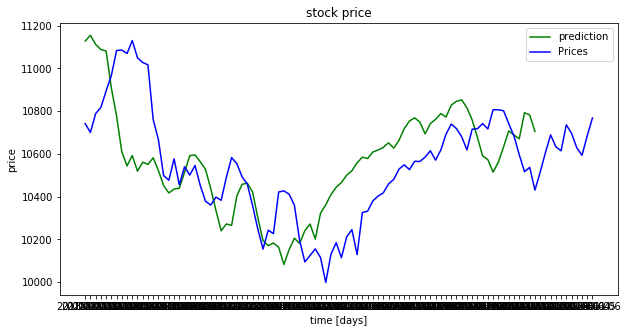

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.plot(rescaled_testPredict,color='green',label='prediction')
plt.plot(testLables, color = 'blue', label = 'Prices')
#plt.plot(df.Close.values, color = 'blue', label = 'Prices')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()